In [12]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

#Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Exploring
import scipy.stats as stats

#Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format='{:20,.2f}'.format

import acquire
import summarize
import prepare

# Load the tips dataset from either pydataset or seaborn.
from pydataset import data

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import wrangle_mall as wm

Use the iris dataset.

Perform clustering with sepal length, sepal width, and petal length.
Use a k of 4.

Create a 3d visualization that shows your clusters along with the features specified above?

Is 4 the optimal number? Try different values of k and visualize your results.


Use the mall dataset.

Perform clustering using annual income and spending score. Try out different values for k.

Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?

Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.
Load the tips dataset

Perform k-means clustering with tip and total_bill. Try a k of 2 and a k of 3. Visualize the resulting clusters.

Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.

Use the resulting clusters to explore your dataset. What is the average party size for each cluster? How many smokers vs non smokers are in each cluster? Is this different than in the overall population?

In [13]:
df = data('iris')
df = df.rename(columns={'Sepal.Length': 'sepal_length', 'Sepal.Width': 'sepal_width', 'Petal.Length': 'petal_length', 'Petal.Width':'petal_width', 'Species':'species'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


In [14]:
from sklearn.cluster import KMeans

X = df[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[5.9016129  4.39354839 1.43387097]
 [5.006      1.462      0.246     ]
 [6.85       5.74210526 2.07105263]]


In [15]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,sepal_length,petal_length,petal_width
0,5.90,4.39,1.43
1,5.01,1.46,0.25
2,6.85,5.74,2.07


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

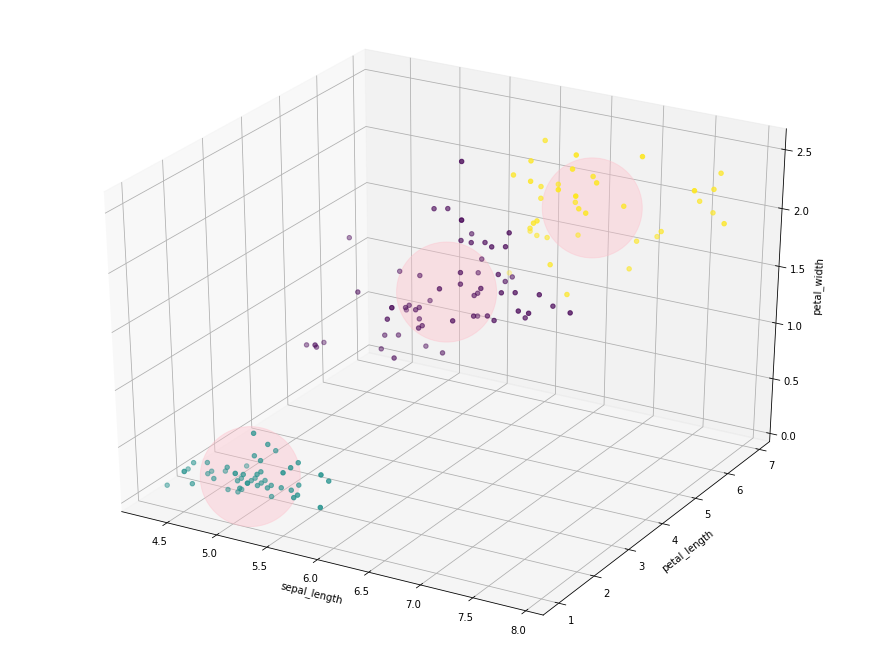

In [16]:
%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df.sepal_length, df.petal_length, df.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')

[[6.26444444 4.88666667 1.66666667]
 [5.006      1.462      0.246     ]
 [7.01481481 5.91851852 2.15555556]
 [5.53214286 3.96071429 1.22857143]]


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

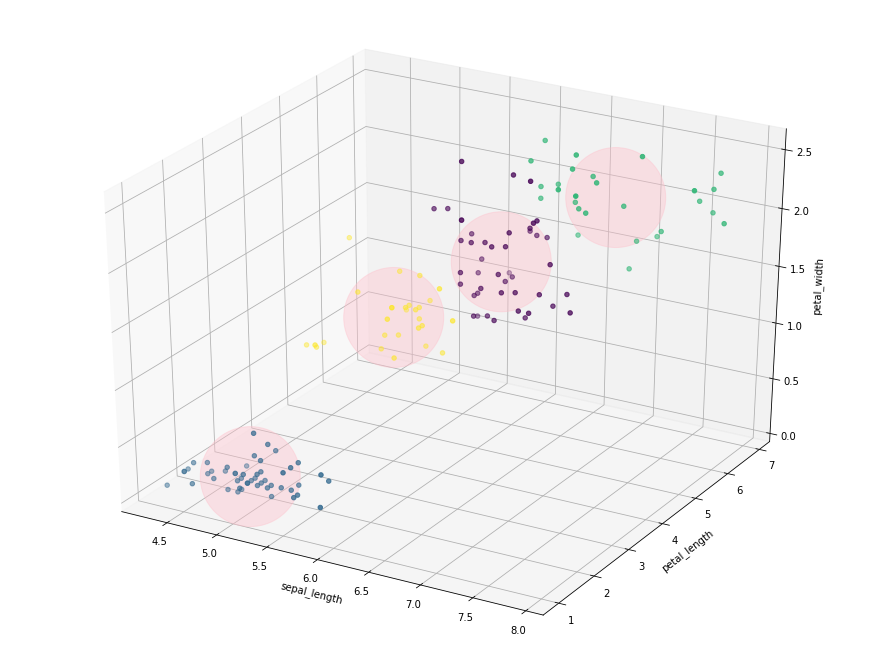

In [17]:
X = df[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df.sepal_length, df.petal_length, df.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')

[[6.512      5.512      2.132     ]
 [5.006      1.462      0.246     ]
 [5.53214286 3.96071429 1.22857143]
 [7.475      6.3        2.05      ]
 [6.25142857 4.75142857 1.58      ]]


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

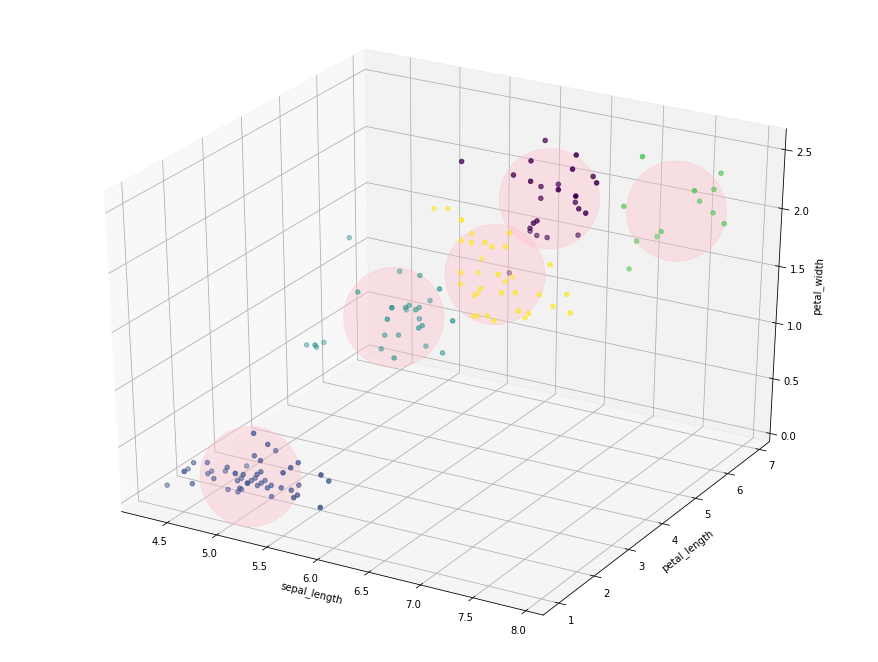

In [18]:
X = df[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

print(kmeans.cluster_centers_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df.sepal_length, df.petal_length, df.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')

Text(0, 0.5, 'inertia')

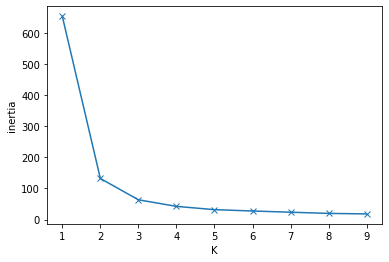

In [19]:
%matplotlib inline
iris_subset = df[['petal_length', 'petal_width', 'sepal_length']]

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(iris_subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

Use the mall dataset.

Perform clustering using annual income and spending score. Try out different values for k.

Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?

Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created. 

In [29]:
df_mall = wm.get_mallcustomer_data()
df_mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


[Text(0.5, 0, 'spending_score'), Text(0.5, 0, 'annual_income')]

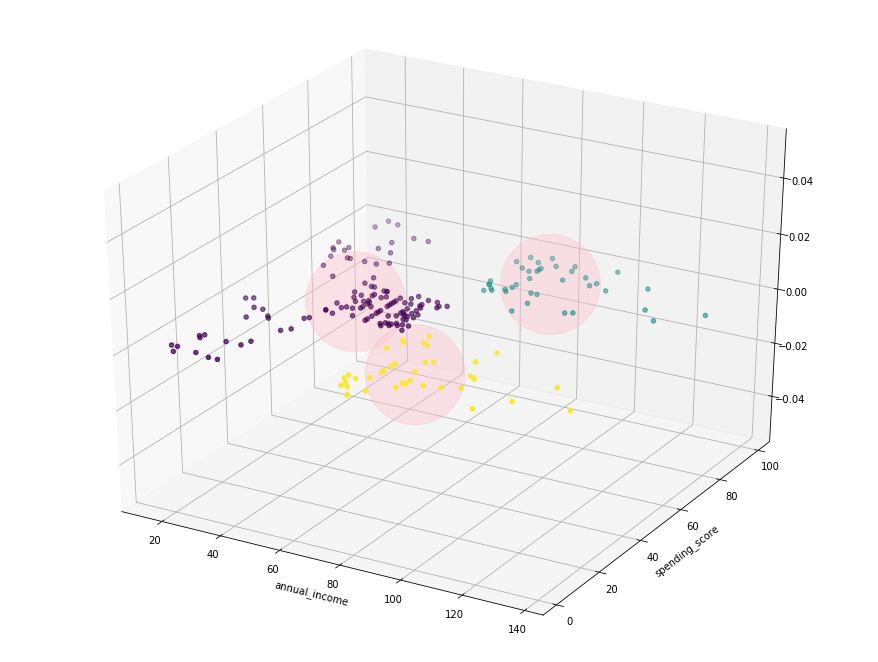

In [27]:
X = df_mall[['annual_income','spending_score']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df_mall.annual_income, df_mall.spending_score, c=kmeans.labels_)
ax.scatter(centers.annual_income, centers.spending_score, c='pink', s=10000, alpha=.4)
ax.set(xlabel='annual_income', ylabel='spending_score')

[Text(0.5, 0, 'spending_score'), Text(0.5, 0, 'annual_income')]

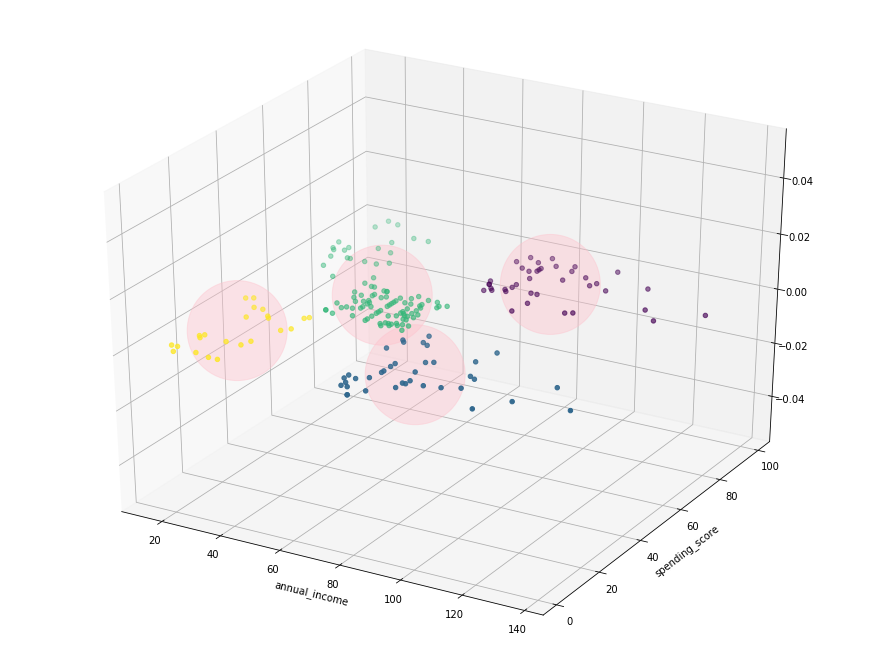

In [28]:
X = df_mall[['annual_income','spending_score']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df_mall.annual_income, df_mall.spending_score, c=kmeans.labels_)
ax.scatter(centers.annual_income, centers.spending_score, c='pink', s=10000, alpha=.4)
ax.set(xlabel='annual_income', ylabel='spending_score')

[Text(0.5, 0, 'spending_score'), Text(0.5, 0, 'annual_income')]

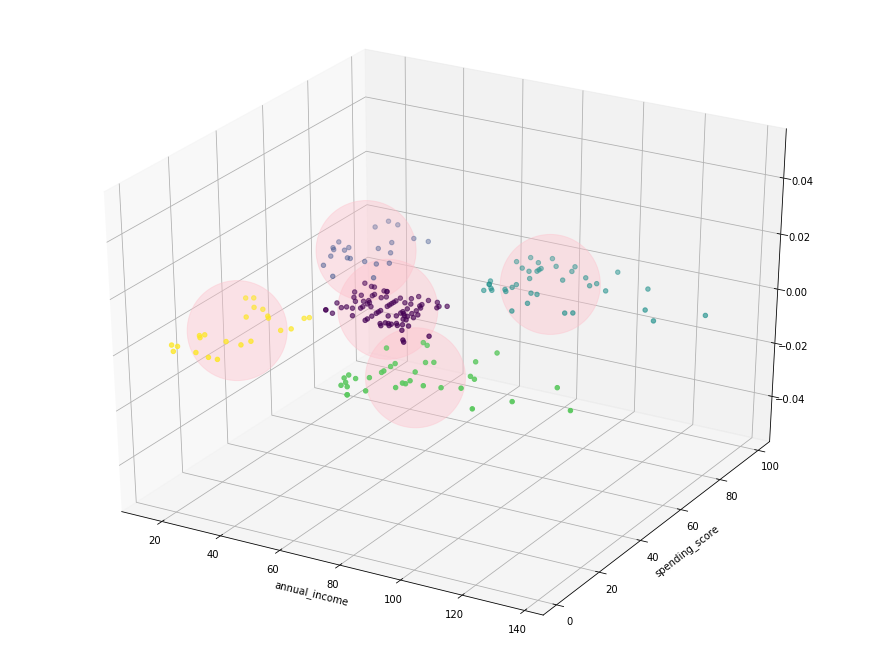

In [30]:
X = df_mall[['annual_income','spending_score']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df_mall.annual_income, df_mall.spending_score, c=kmeans.labels_)
ax.scatter(centers.annual_income, centers.spending_score, c='pink', s=10000, alpha=.4)
ax.set(xlabel='annual_income', ylabel='spending_score')

Text(0, 0.5, 'inertia')

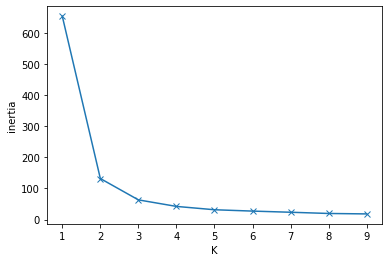

In [31]:
%matplotlib inline
X = df_mall[['annual_income','spending_score']]

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(iris_subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

In [40]:
kmeans = KMeans(n_clusters=5).fit(df_mall[['annual_income','spending_score']])

df_mall['cluster'] = kmeans.labels_
df_mall.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,1
3,Female,20,16,6,3
4,Female,23,16,77,1
5,Female,31,17,40,3


In [41]:
df_mall.groupby('cluster').mean()

,age,annual_income,spending_score
cluster,,,
0,41.11,88.20,17.11
1,25.27,25.73,79.36
2,32.69,86.54,82.13
3,45.22,26.30,20.91
4,42.72,55.30,49.52


Perform k-means clustering with tip and total_bill. 

Try a k of 2 and a k of 3. 

Visualize the resulting clusters.

Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.

Use the resulting clusters to explore your dataset. What is the average party size for each cluster? 

How many smokers vs non smokers are in each cluster? Is this different than in the overall population?

In [42]:
df_tips = data('tips')

In [43]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


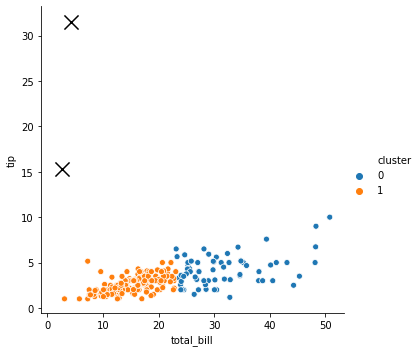

In [66]:
X = df_tips[['tip','total_bill']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

df_tips['cluster'] = kmeans.labels_

sns.relplot(data=df_tips, y='tip', x='total_bill', hue='cluster')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black')

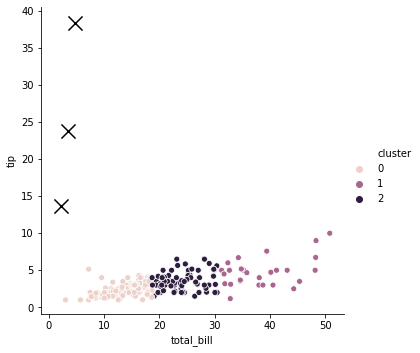

In [67]:
X = df_tips[['tip','total_bill']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

df_tips['cluster'] = kmeans.labels_

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

sns.relplot(data=df_tips, y='tip', x='total_bill', hue='cluster')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black')

Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.

Use the resulting clusters to explore your dataset. What is the average party size for each cluster?

How many smokers vs non smokers are in each cluster? Is this different than in the overall population?

Text(0, 0.5, 'inertia')

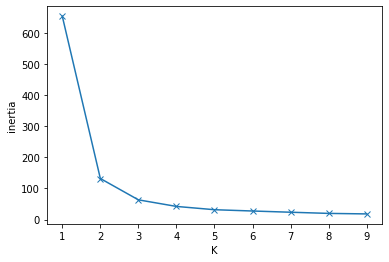

In [57]:
%matplotlib inline
X = df_tips[['tip','total_bill','size']]

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(iris_subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

[Text(0.5, 0, ''), Text(0.5, 0, 'bill'), Text(0.5, 0, 'tip')]

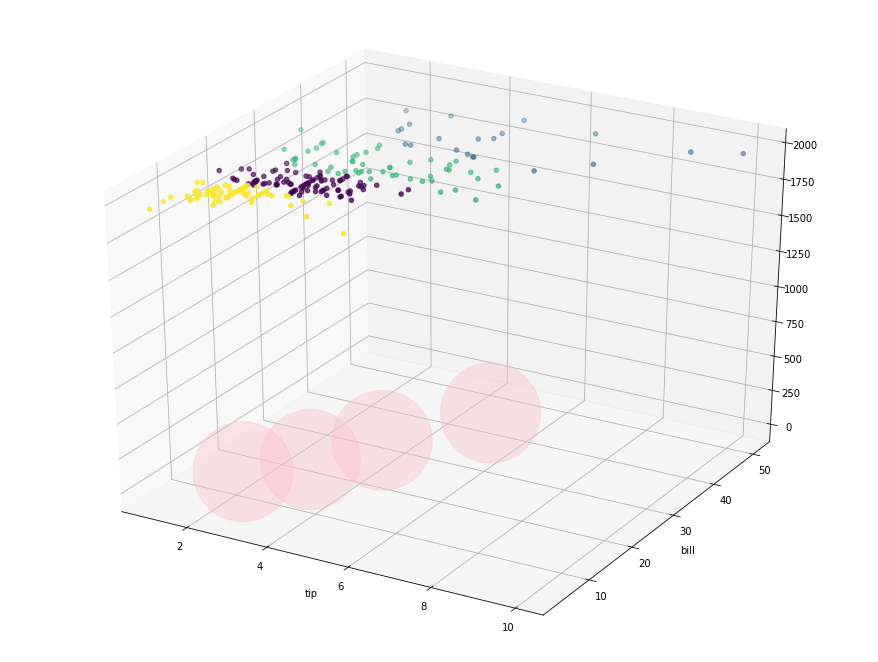

In [68]:
X = df_tips[['tip','total_bill','size']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

df_tips['cluster'] = kmeans.labels_

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df_tips.tip, df_tips.total_bill, df_tips.size, c=kmeans.labels_)
ax.scatter(centers.tip, centers.total_bill, centers.size, c='pink', s=10000, alpha=.4)
ax.set(xlabel='tip', ylabel='bill', zlabel="")


In [69]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
1,16.99,1.01,Female,No,Sun,Dinner,2,0
2,10.34,1.66,Male,No,Sun,Dinner,3,3
3,21.01,3.50,Male,No,Sun,Dinner,3,0
4,23.68,3.31,Male,No,Sun,Dinner,2,2
5,24.59,3.61,Female,No,Sun,Dinner,4,2


In [98]:
df_nonsmokers = df_tips[df_tips.smoker=='No'].groupby('cluster').count()
df_nonsmokers

,total_bill,tip,sex,smoker,day,time,size
cluster,,,,,,,
0,63,63,63,63,63,63,63
1,11,11,11,11,11,11,11
2,28,28,28,28,28,28,28
3,49,49,49,49,49,49,49


In [100]:
df_smokers = df_tips[df_tips.smoker=='Yes'].groupby('cluster').count()
df_smokers.head()

,total_bill,tip,sex,smoker,day,time,size
cluster,,,,,,,
0,31,31,31,31,31,31,31
1,10,10,10,10,10,10,10
2,23,23,23,23,23,23,23
3,29,29,29,29,29,29,29


In [71]:
df_tips.mean()

total_bill                  19.79
tip                          3.00
size                         2.57
cluster                      1.46
dtype: float64